In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('./data/Churn_Modelling.csv').drop(columns=['RowNumber', 'CustomerId', 'Surname']).reset_index(drop=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Descriptive Data

## Descriptive statistics

In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Grouping dataframe by Geography

In [4]:
df.groupby(by=['Geography']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


## Variables distribution

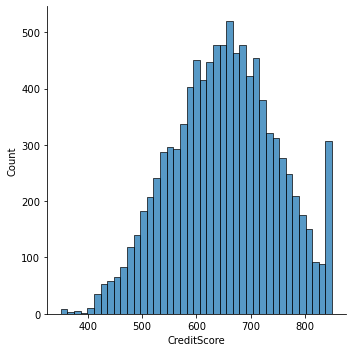

In [5]:
sns.displot(df, x='CreditScore')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

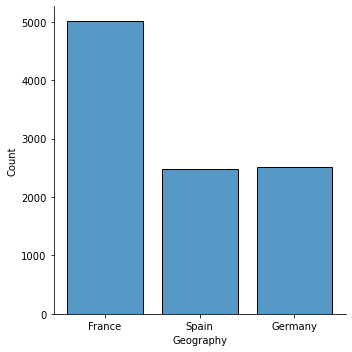

In [6]:
display(df['Geography'].value_counts())
sns.displot(df, x='Geography', shrink=.8)

Male      5457
Female    4543
Name: Gender, dtype: int64

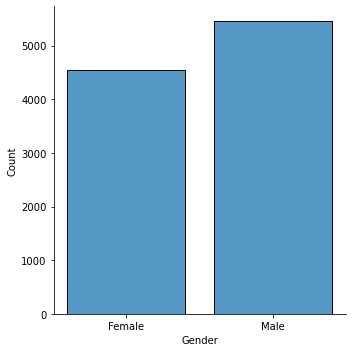

In [7]:
display(df['Gender'].value_counts())
sns.displot(df, x='Gender', shrink=.8)

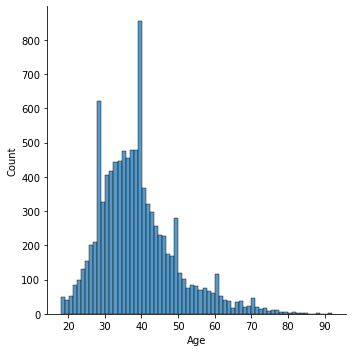

In [8]:
sns.displot(df, x='Age')

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

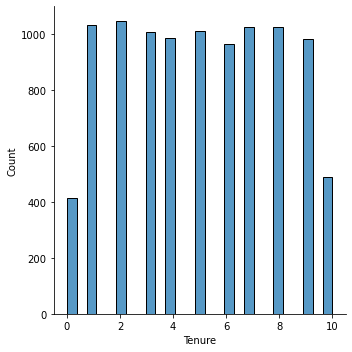

In [9]:
display(df['Tenure'].value_counts())
sns.displot(df, x='Tenure')

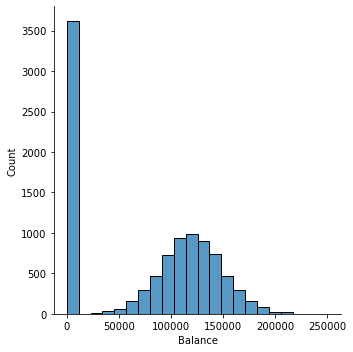

In [10]:
sns.displot(df, x='Balance')

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

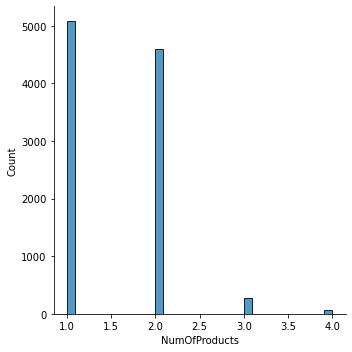

In [11]:
display(df['NumOfProducts'].value_counts())
sns.displot(df, x='NumOfProducts')

1    7055
0    2945
Name: HasCrCard, dtype: int64

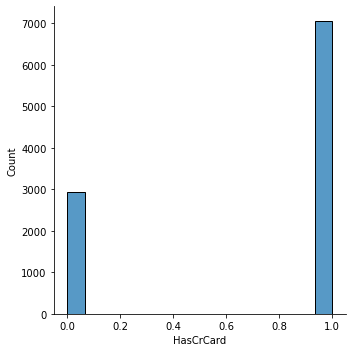

In [12]:
display(df['HasCrCard'].value_counts())
sns.displot(df, x='HasCrCard')

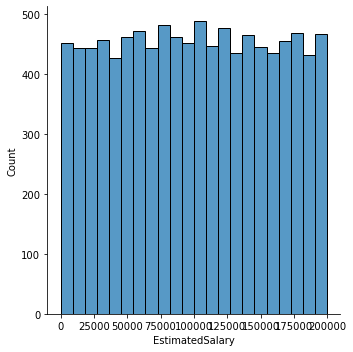

In [13]:
sns.displot(df, x='EstimatedSalary')

0    7963
1    2037
Name: Exited, dtype: int64

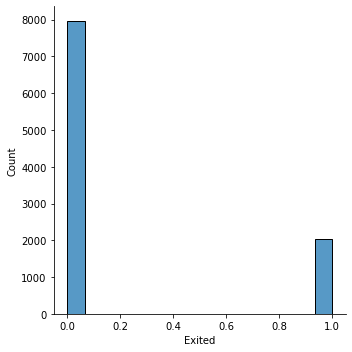

In [14]:
display(df['Exited'].value_counts())
sns.displot(df, x='Exited')

# Data treatment

## Changing categorical variables to continuous

In [15]:
df['Gender'] = df['Gender'].replace({'Female':0,
                                     'Male':1})

df['Geography'] = df['Geography'].replace({'France':0,
                                           'Germany':1,
                                           'Spain':2})

df.to_csv('data/Churn_Modelling_1.csv')

# predictive model 

In [16]:
def run_metrics(model, X_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    score = model.score(x_test, y_test)
    
    cm = sm.confusion_matrix(y_test, predictions)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score*100)
    plt.title(all_sample_title, size = 15);

## Logistic Regression  v1

In [17]:
x = df.loc[:, 'CreditScore':'EstimatedSalary']
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

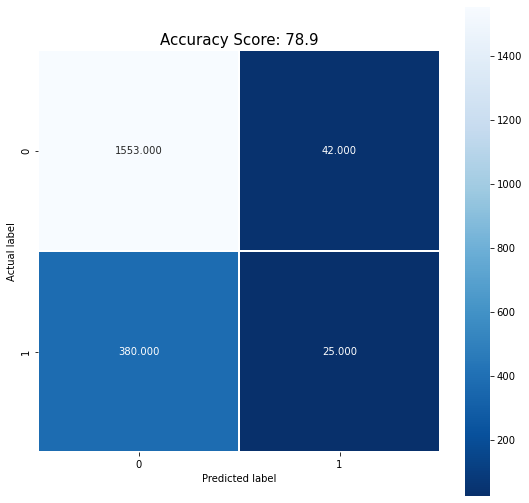

In [18]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

run_metrics(logisticRegr, x_train, y_train, x_test, y_test)

## Logistic Regression V2

In [19]:
df_norm = (df-df.min())/(df.max()-df.min())
x = df_norm.loc[:, 'CreditScore':'EstimatedSalary']
y = df_norm['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

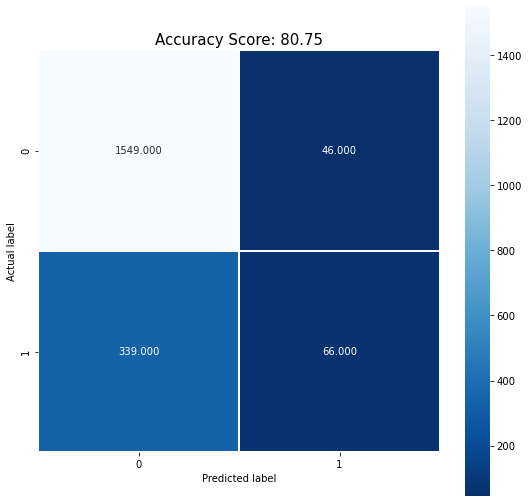

In [20]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

run_metrics(logisticRegr, x_train, y_train, x_test, y_test)

## Neural network

In [21]:
import sklearn as sk
import sklearn.neural_network

In [28]:
df_norm = (df-df.min())/(df.max()-df.min())
x = df_norm.loc[:, 'CreditScore':'EstimatedSalary']
y = df_norm['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [33]:
nn = [10, 2, 2, 2]
model = sk.neural_network.MLPRegressor(solver='sgd',
                                       activation='logistic',
                                       learning_rate_init=0.01,
                                       hidden_layer_sizes=nn[1:],
                                       verbose=True,
                                       n_iter_no_change=1000,
                                       max_iter=10000)

model.fit(x_train, y_train)

Iteration 1, loss = 0.09089620
Iteration 2, loss = 0.08074438
Iteration 3, loss = 0.08072428
Iteration 4, loss = 0.08070895
Iteration 5, loss = 0.08069653
Iteration 6, loss = 0.08070653
Iteration 7, loss = 0.08067524
Iteration 8, loss = 0.08071000
Iteration 9, loss = 0.08069153
Iteration 10, loss = 0.08069973
Iteration 11, loss = 0.08070038
Iteration 12, loss = 0.08068831
Iteration 13, loss = 0.08068299
Iteration 14, loss = 0.08068603
Iteration 15, loss = 0.08069810
Iteration 16, loss = 0.08069803
Iteration 17, loss = 0.08069878
Iteration 18, loss = 0.08068554
Iteration 19, loss = 0.08074157
Iteration 20, loss = 0.08068815
Iteration 21, loss = 0.08075597
Iteration 22, loss = 0.08069821
Iteration 23, loss = 0.08073644
Iteration 24, loss = 0.08070203
Iteration 25, loss = 0.08067326
Iteration 26, loss = 0.08069625
Iteration 27, loss = 0.08069482
Iteration 28, loss = 0.08072605
Iteration 29, loss = 0.08070587
Iteration 30, loss = 0.08068313
Iteration 31, loss = 0.08071337
Iteration 32, los

MLPRegressor(activation='logistic', hidden_layer_sizes=[2, 2, 2],
             learning_rate_init=0.01, max_iter=10000, n_iter_no_change=1000,
             solver='sgd', verbose=True)

In [34]:
print(model.score(x_test, y_test)*100)

2.5358199330847264


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [36]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [41]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.74,0.74,0.86,0.28
XGBClassifier,0.86,0.74,0.74,0.85,0.62
AdaBoostClassifier,0.86,0.73,0.73,0.85,0.67
RandomForestClassifier,0.86,0.73,0.73,0.85,1.61
ExtraTreesClassifier,0.86,0.73,0.73,0.85,1.25
BaggingClassifier,0.85,0.72,0.72,0.84,0.42
DecisionTreeClassifier,0.80,0.71,0.71,0.80,0.09
NearestCentroid,0.69,0.70,0.70,0.72,0.04
SVC,0.86,0.69,0.69,0.84,1.60


In [42]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 42/42 [01:22<00:00,  1.95s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.39,0.39,0.32,1.58
LGBMRegressor,0.38,0.39,0.32,0.26
GradientBoostingRegressor,0.38,0.39,0.32,1.99
RandomForestRegressor,0.35,0.36,0.33,3.24
ExtraTreesRegressor,0.33,0.33,0.33,1.61
SVR,0.33,0.33,0.33,2.76
MLPRegressor,0.33,0.33,0.33,13.59
XGBRegressor,0.31,0.31,0.34,0.65
BaggingRegressor,0.29,0.30,0.34,0.40
